In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data-penduduk-mojokerto.csv', index_col=0)
df.head()

,kab_kota,tahun,kecamatan,kelurahan,kelahiran,kematian,mutasi_datang,mutasi_keluar
propinsi,,,,,,,,
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Mentikan,87,61,84,108
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Kauman,50,25,59,52
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Pulorejo,122,71,170,68
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Prajurit_kulon,122,52,164,84
Jawa_Timur,Kota_Mojokerto,2016,Prajurit_Kulon,Surodinawan,129,42,271,119


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Jawa_Timur to Jawa_Timur
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kab_kota       18 non-null     object
 1   tahun          18 non-null     int64 
 2   kecamatan      18 non-null     object
 3   kelurahan      18 non-null     object
 4   kelahiran      18 non-null     int64 
 5   kematian       18 non-null     int64 
 6   mutasi_datang  18 non-null     int64 
 7   mutasi_keluar  18 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ KB


In [4]:
df.describe()


,tahun,kelahiran,kematian,mutasi_datang,mutasi_keluar
count,18.0,18.000000,18.000000,18.000000,18.000000
mean,2016.0,96.833333,78.333333,149.388889,117.666667
std,0.0,73.308574,52.218996,94.975625,88.261643
min,2016.0,11.000000,25.000000,23.000000,28.000000
25%,2016.0,51.500000,41.250000,65.250000,62.750000
50%,2016.0,81.500000,57.500000,141.500000,93.000000
75%,2016.0,122.000000,103.000000,181.250000,128.750000
max,2016.0,279.000000,207.000000,342.000000,392.000000


In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

kab_kota: Number of unique values 1
tahun: Number of unique values 1
kecamatan: Number of unique values 3
kelurahan: Number of unique values 18
kelahiran: Number of unique values 16
kematian: Number of unique values 16
mutasi_datang: Number of unique values 18
mutasi_keluar: Number of unique values 18


In [6]:
df.drop(['kab_kota', 'tahun'], axis="columns", inplace=True)

In [7]:
df.describe()


,kelahiran,kematian,mutasi_datang,mutasi_keluar
count,18.000000,18.000000,18.000000,18.000000
mean,96.833333,78.333333,149.388889,117.666667
std,73.308574,52.218996,94.975625,88.261643
min,11.000000,25.000000,23.000000,28.000000
25%,51.500000,41.250000,65.250000,62.750000
50%,81.500000,57.500000,141.500000,93.000000
75%,122.000000,103.000000,181.250000,128.750000
max,279.000000,207.000000,342.000000,392.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Jawa_Timur to Jawa_Timur
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kecamatan      18 non-null     object
 1   kelurahan      18 non-null     object
 2   kelahiran      18 non-null     int64 
 3   kematian       18 non-null     int64 
 4   mutasi_datang  18 non-null     int64 
 5   mutasi_keluar  18 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1008.0+ bytes


In [9]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

kecamatan : ['Prajurit_Kulon' 'Magersari' 'Kranggan']
Prajurit_Kulon    6
Magersari         6
Kranggan          6
Name: kecamatan, dtype: int64
kelurahan : ['Mentikan' 'Kauman' 'Pulorejo' 'Prajurit_kulon' 'Surodinawan' 'Blooto'
 'Gunung_gedangan' 'Magersari' 'Gedongan' 'Balongsari' 'Kedundung' 'Wates'
 'Kranggan' 'Miji' 'Meri' 'Jagalan' 'Sentanan' 'Purwotengah']
Mentikan           1
Kauman             1
Sentanan           1
Jagalan            1
Meri               1
Miji               1
Kranggan           1
Wates              1
Kedundung          1
Balongsari         1
Gedongan           1
Magersari          1
Gunung_gedangan    1
Blooto             1
Surodinawan        1
Prajurit_kulon     1
Pulorejo           1
Purwotengah        1
Name: kelurahan, dtype: int64


In [10]:
len(object_col)

2

<Axes: xlabel='kelahiran', ylabel='kelurahan'>

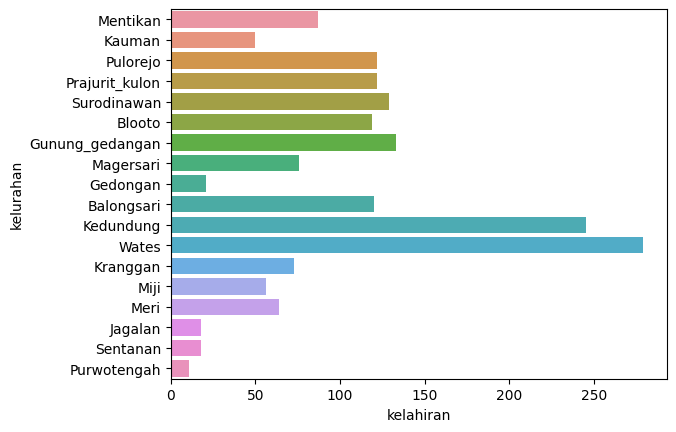

In [11]:
sns.barplot(data=df, x="kelahiran", y= "kelurahan")

<Axes: xlabel='kematian', ylabel='kelurahan'>

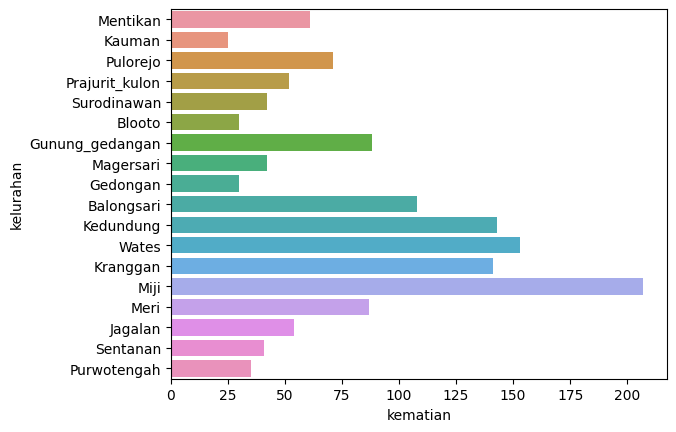

In [12]:
sns.barplot(data=df, x="kematian", y= "kelurahan")

<Axes: xlabel='kecamatan', ylabel='kematian'>

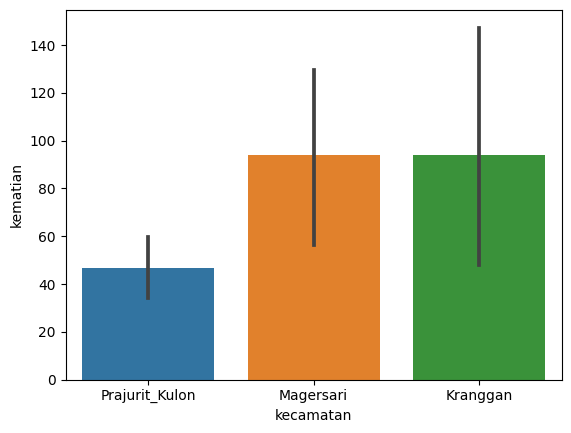

In [13]:
sns.barplot(data=df, x="kecamatan", y= "kematian")

<Axes: xlabel='mutasi_keluar', ylabel='kelurahan'>

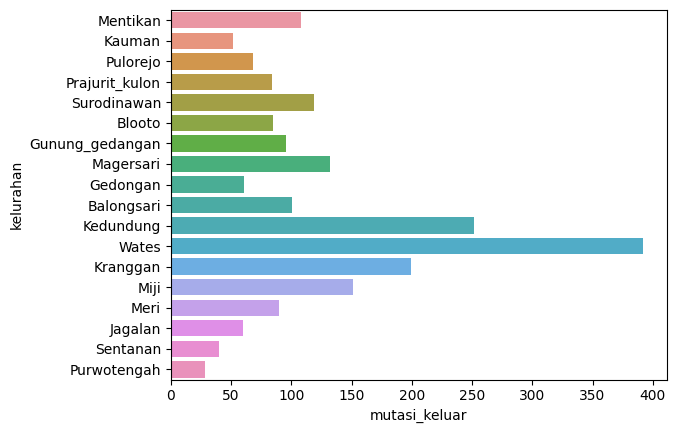

In [14]:
sns.barplot(data=df, x="mutasi_keluar", y= "kelurahan")

<Axes: xlabel='mutasi_datang', ylabel='kelurahan'>

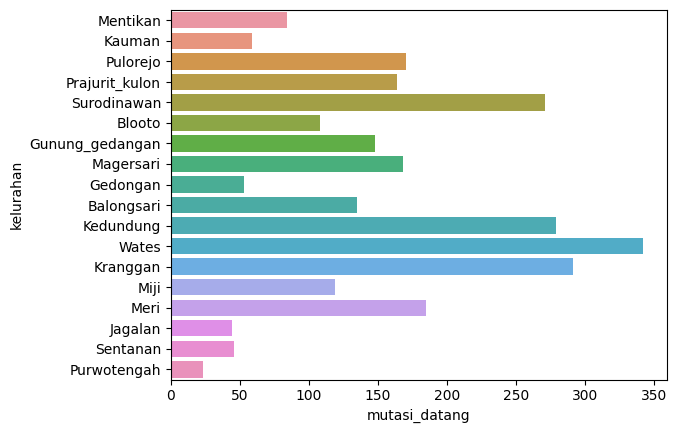

In [15]:
sns.barplot(data=df, x="mutasi_datang", y= "kelurahan")

<Axes: xlabel='kecamatan', ylabel='kelahiran'>

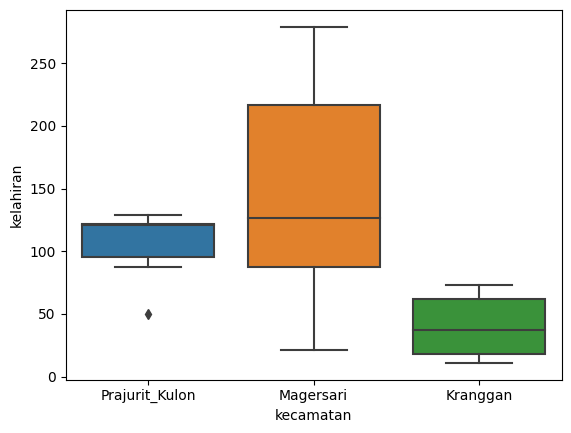

In [16]:
sns.boxplot(data=df, x="kecamatan", y= "kelahiran")

<Axes: xlabel='kecamatan', ylabel='kematian'>

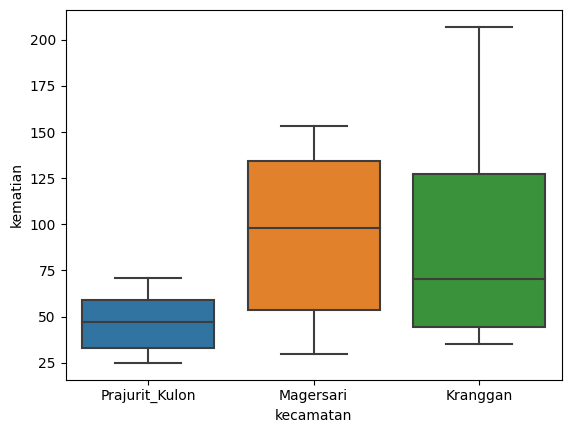

In [17]:
sns.boxplot(data=df, x="kecamatan", y= "kematian")

<Axes: xlabel='kecamatan', ylabel='mutasi_datang'>

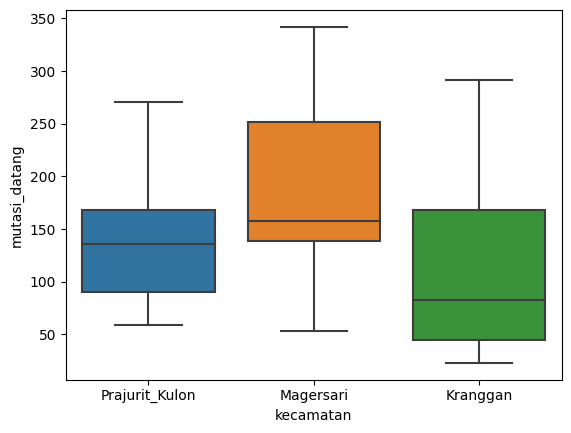

In [18]:
sns.boxplot(data=df, x="kecamatan", y= "mutasi_datang")

<Axes: xlabel='kecamatan', ylabel='mutasi_keluar'>

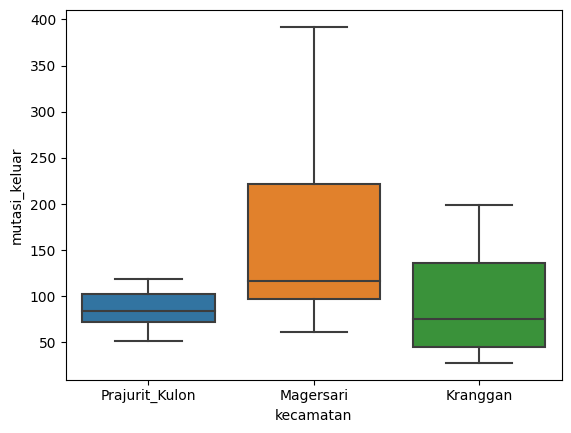

In [19]:
sns.boxplot(data=df, x="kecamatan", y= "mutasi_keluar")

<ipython-input-20-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


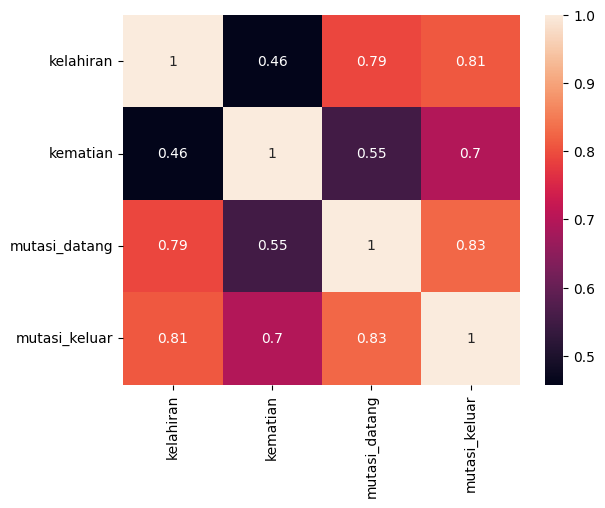

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.show()